![UC Davis DataLab](https://datalab.ucdavis.edu/wp-content/uploads/2019/07/datalab-logo-full-color-rgb-1.png)

This file contains supplementary code for the workshop [GETTING STARTED WITH TEXTUAL DATA IN PYTHON](https://datalab.ucdavis.edu/eventscalendar/getting-started-with-textual-data-in-python-3-part-series/). Please see the [Topic Modeling](https://ucdavisdatalab.github.io/workshop_getting_started_with_textual_data/06_topic-modeling.html) section of the [Course Reader](https://ucdavisdatalab.github.io/workshop_getting_started_with_textual_data/index.html) for relevant narrative explanation of the concepts explored in this notebook.

**Model Fitting**

![Model Fitting](https://miro.medium.com/max/1280/1*SBUK2QEfCP-zvJmKm14wGQ.png)

[Image Source](https://medium.com/hackernoon/memorizing-is-not-learning-6-tricks-to-prevent-overfitting-in-machine-learning-820b091dc42)


**Dirichlet Prior Visualization**

![Some Examples of Distribution Prior Effects on Model](https://miro.medium.com/max/1400/1*3oOHy1tUfUT9Z379Alb9nA.png)

[Image Source](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158)

**Interactive Visualizations**

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

Setup Basic Triangle 

In [3]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

Plot the basic triangle

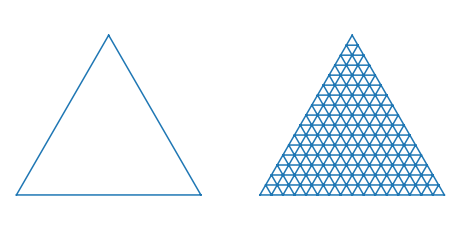

In [4]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')

Next we map the x-y coordinates of the mesh vertices to the simplex coordinate space

In [5]:
# For each corner of the triangle, the pair of other corners
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

Compute Dirichlet coordinates for mesh vertices

In [6]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])

Define a function to draw contours of distribution

In [7]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

Now we can play

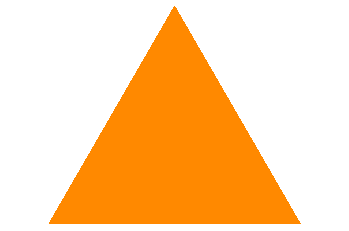

In [13]:
# The case of α[i] = (1,1,1)
draw_pdf_contours(Dirichlet([1, 1, 1]))

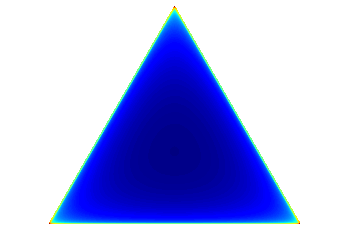

In [9]:
# For values of α[i] < 1 the distribution concentrates in the corners and along the boundaries of the simplex
draw_pdf_contours(Dirichlet([0.999, 0.999, 0.999]))

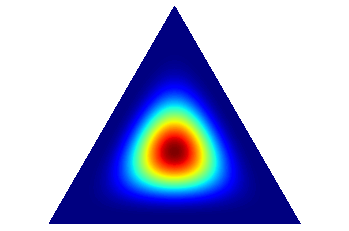

In [10]:
# For values of α[i] > 1 the distribution tends toward the center of the simplex
draw_pdf_contours(Dirichlet([5, 5, 5]))

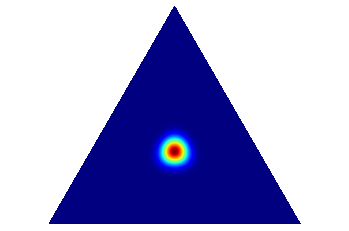

In [11]:
# As α[i] increases the distribution becomes highly concentrated in the center
draw_pdf_contours(Dirichlet([50, 50, 50]))

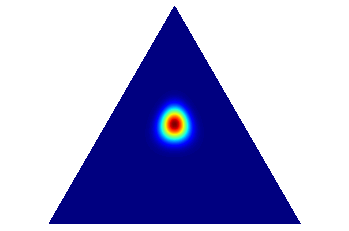

In [12]:
# For a symmetric Dirichlet with all values of α > 1 we will produce fair dice, 
# on average. If the goal is to produce loaded dice (e.g., with a higher 
# probability of rolling a 3), we would want an asymmetric (noncentral) Dirichlet 
# distribution with a higher value for α[3]
draw_pdf_contours(Dirichlet([30, 30, 50]))

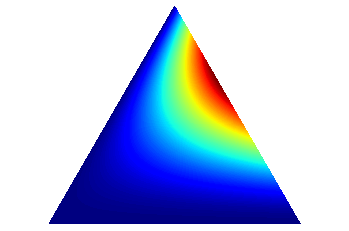

In [13]:
# Let's draw a progressively nonsymetrical distribution of α[1]
draw_pdf_contours(Dirichlet([1, 2, 3]))

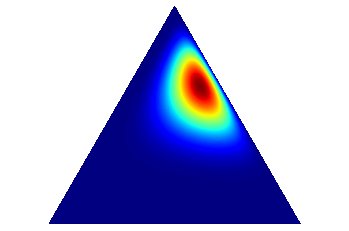

In [10]:
# what if we make the α[i] sequence Ziphian?
draw_pdf_contours(Dirichlet([2, 4.5, 8.75, 17, 37, 80]))